In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [23]:
top_10 = (df.groupby('name')['quantity', 'ext price'].agg({'ext price': 'sum', 'quantity': 'count'}).sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True);

<ipython-input-23-4b6cdd48767d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10 = (df.groupby('name')['quantity', 'ext price'].agg({'ext price': 'sum', 'quantity': 'count'}).sort_values(by='ext price', ascending=False))[:10].reset_index()


In [4]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
plt.style.use('ggplot')

<AxesSubplot:ylabel='Name'>

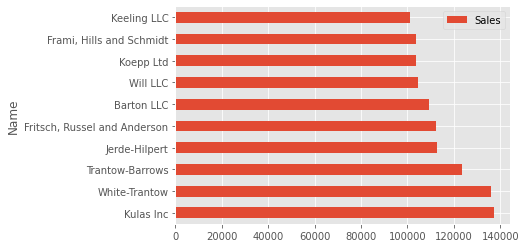

In [7]:
top_10.plot(kind='barh', y='Sales', x='Name')

<AxesSubplot:ylabel='Name'>

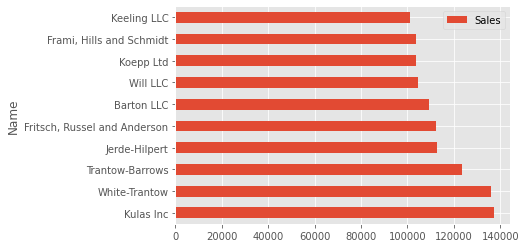

In [8]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)

[Text(0.5, 1.0, '2014 Revenue'),
 Text(0, 0.5, 'Customer'),
 Text(0.5, 0, 'Total Revenue'),
 (-10000.0, 140000.0)]

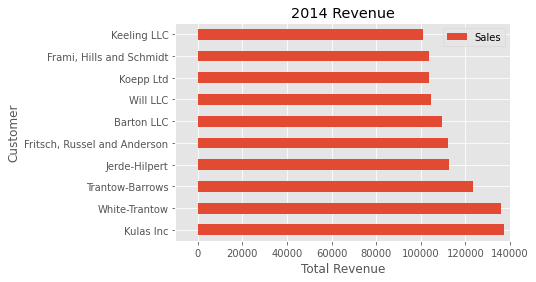

In [9]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set(title='2014 Revenue', ylabel='Customer', xlabel='Total Revenue', xlim=[-10000, 140000])

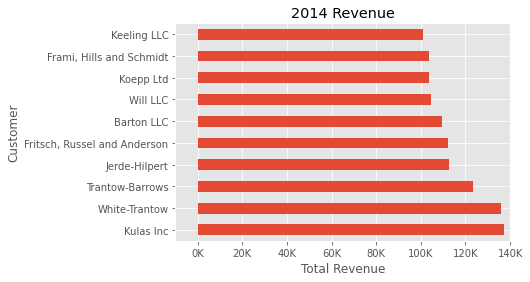

In [10]:
def currency(x, pos):
    if x >= 1000000:
        return '{:1.0f}M'.format(x*1e-6)
    return '{:1.0f}K'.format(x*1e-3)

fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set(title='2014 Revenue', ylabel='Customer', xlabel='Total Revenue', xlim=[-10000, 140000])
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

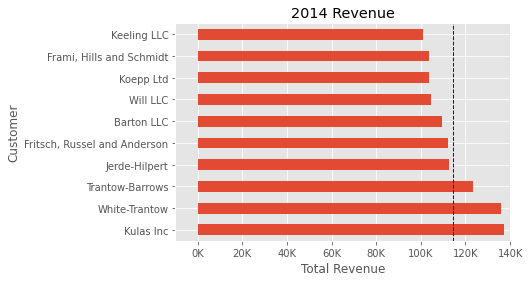

In [11]:
fig, ax = plt.subplots()

top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
avg = top_10['Sales'].mean()

ax.set(title='2014 Revenue', ylabel='Customer', xlabel='Total Revenue', xlim=[-10000, 140000])
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

Text(0.5, 0.98, '2014 Sales Analysis')

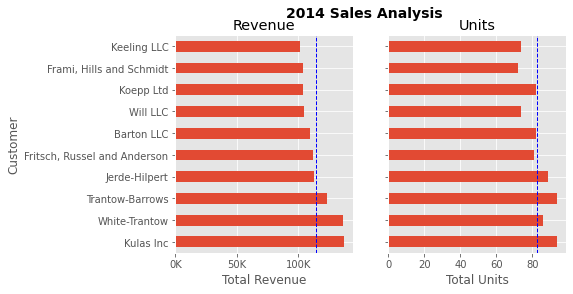

In [12]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

top_10.plot(kind='barh', y='Sales', x='Name', ax=ax0)
ax0.set(title='Revenue', ylabel='Customer', xlabel='Total Revenue')
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)
ax0.legend().set_visible(False)

top_10.plot(kind='barh', y='Purchases', x='Name', ax=ax1)
ax1.set(title='Units', ylabel='Customer', xlabel='Total Units')
avg = top_10['Purchases'].mean()
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)
ax1.legend().set_visible(False)

fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

In [13]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Basic Data Plotting 

Some steps by steps data plotting tutorial from https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html
While we can refer to the online documentation later, I copy here because it's easier to remember by interactively play with the library and it's better for documentation.

### Simple Line Plots

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

All Matplotlib plots start with a figure and axes.

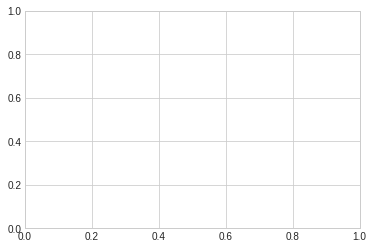

In [15]:
fig = plt.figure()
ax = plt.axes()

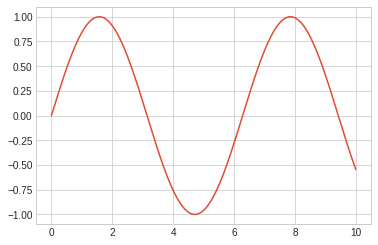

In [16]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

We can use Pylab interface and let the figure and axes be created for us in the background. If we want to create a single figure with multiple lines, we can simply call the `plot` function multiple times.

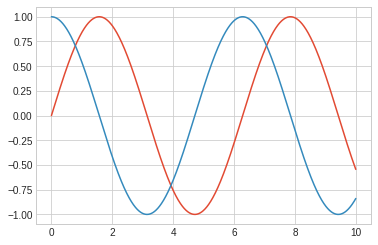

In [17]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

We can choose line color by passing `color` keyword and linestyle by passing `linestyle` keyword to the function `plot`

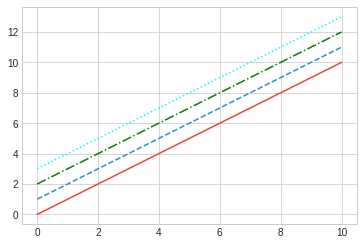

In [18]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='-.', color='green')
plt.plot(x, x + 3, linestyle=':', color='cyan');

### Adjusting the Plot: Axes Limits

The most basic way to adjust axis limits is to use the `plt.xlim()` and `plt.ylim()` methods or use the useful related method `plt.axis()`

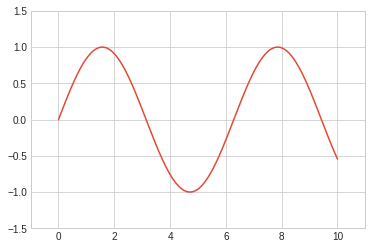

In [19]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

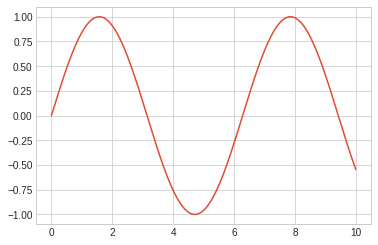

In [20]:
plt.plot(x, np.sin(x))
plt.axis('tight');

### Labeling Plots

Some labels for a plot: titles, axis labels, and simple legends.
When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. 

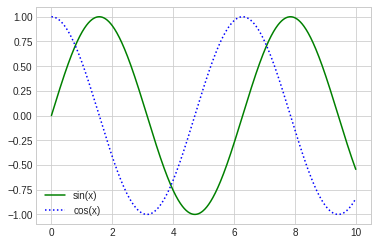

In [21]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('tight')
plt.legend();

### Aside: Matplotlib Gotchas

While most `plt` functions translate directly to `ax` methods, function to set limits, labels and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

* `plt.xlabel()` $\rightarrow$ `ax.set_xlabel()`
* `plt.ylabel()` $\rightarrow$ `ax.set_ylabel()`
* `plt.xlimit()` $\rightarrow$ `ax.set_xlimit()`
* `plt.ylimit()` $\rightarrow$ `ax.set_ylimit()`
* `plt.title()` $\rightarrow$ `ax.set_title()`

In the object-oriented interface, we call `ax.set()` method to set all these properties at once:

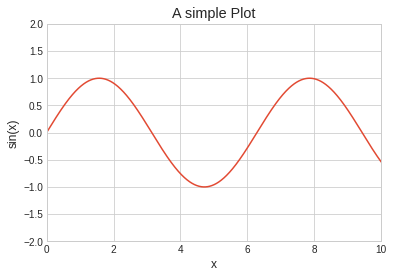

In [22]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0,10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='A simple Plot');

## Simple Scatter Plots

Scatter plot is a type of plot, in which instead of points being joined by line segments, the points are represented individually with a dot, circle, or other shape. The same `plt.plot()` can be used to produce scatter plots

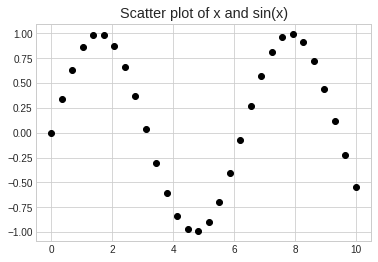

In [29]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');
plt.title('Scatter plot of x and sin(x)');

### Scatter Plots with `plt.scatter`

`plt.scatter` can be used to create scatter plots where the properties of each individual point (size, face, color, edge color, etc.) can be individual controlled or mapped to data.

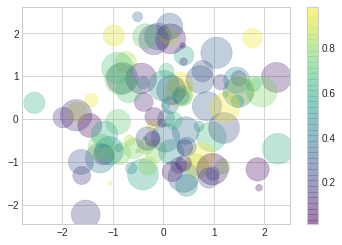

In [30]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
size = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=size, alpha=0.3, cmap='viridis')
plt.colorbar();   # show color scale

In this case, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data. For example, we use the Iris data from Scikit-learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured.

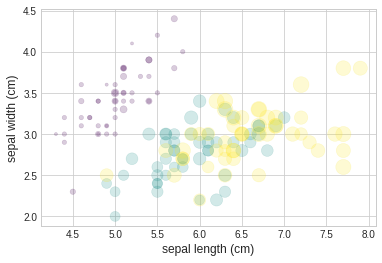

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## Visualizing Errors

### Bar Errors

A basic error bar can be created with a single Matplotlib function call

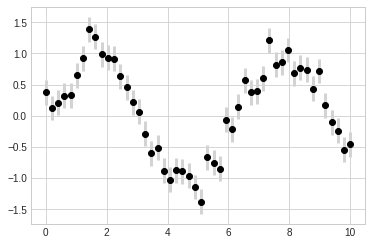

In [40]:
x = np.linspace(0, 10, 50)
dy = 0.2
y = np.sin(x) + dy*np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

### Continuous Errors

It is desireable to show errorbars on continuous quantities. It's relatively easy to combine primities like `plt.plot` and `plt.fill_between` for a useful result. We perform a simple *Gaussian process regression*, using the Scikitlearn API for fitting non-parametric function to data with a continuous measure of the uncertainty.

### Visualizing a Three-Dimensional Function

We will demonstrate a contour plot using a function $z = f(x,y)$, using the following particular choice for $f$

In [45]:
def f(x,y): return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

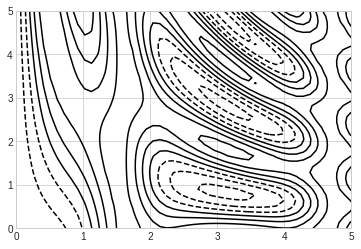

In [49]:
plt.contour(X, Y, Z, colors='black');